In [3]:
import numpy as np
import pandas as pd
import seaborn as sns
%matplotlib inline
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch

In [4]:
data = np.array(pd.read_fwf('/home/bear/Downloads/T1-9.dat', 
            widths=[4,5,6,6,5,5,6,7], 
            header=None, 
            names=('Country', '100m (s)', '200m (s)',
                   '400m (s)', '800m (min)', '1500m (min)',
                   '3000m (min)', 'Marathon (min)')))

In [5]:
dis_mat = np.zeros((len(data), len(data)))

In [6]:
for i in range(0, len(data)):
    for j in range(0, i):
        dis_mat[j][i] = np.sqrt(np.dot(np.transpose(data[i,1:]), data[j,1:]))

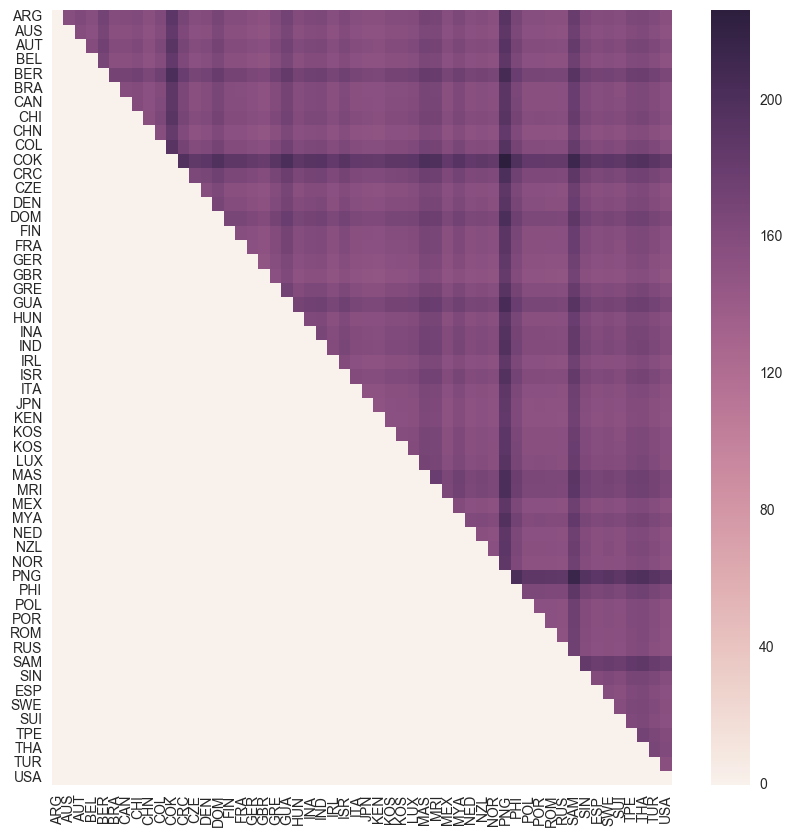

In [7]:
f, ax = plt.subplots(figsize=(10, 10))
sns.heatmap(dis_mat, ax=ax, xticklabels=data[:,0], yticklabels=data[:,0])

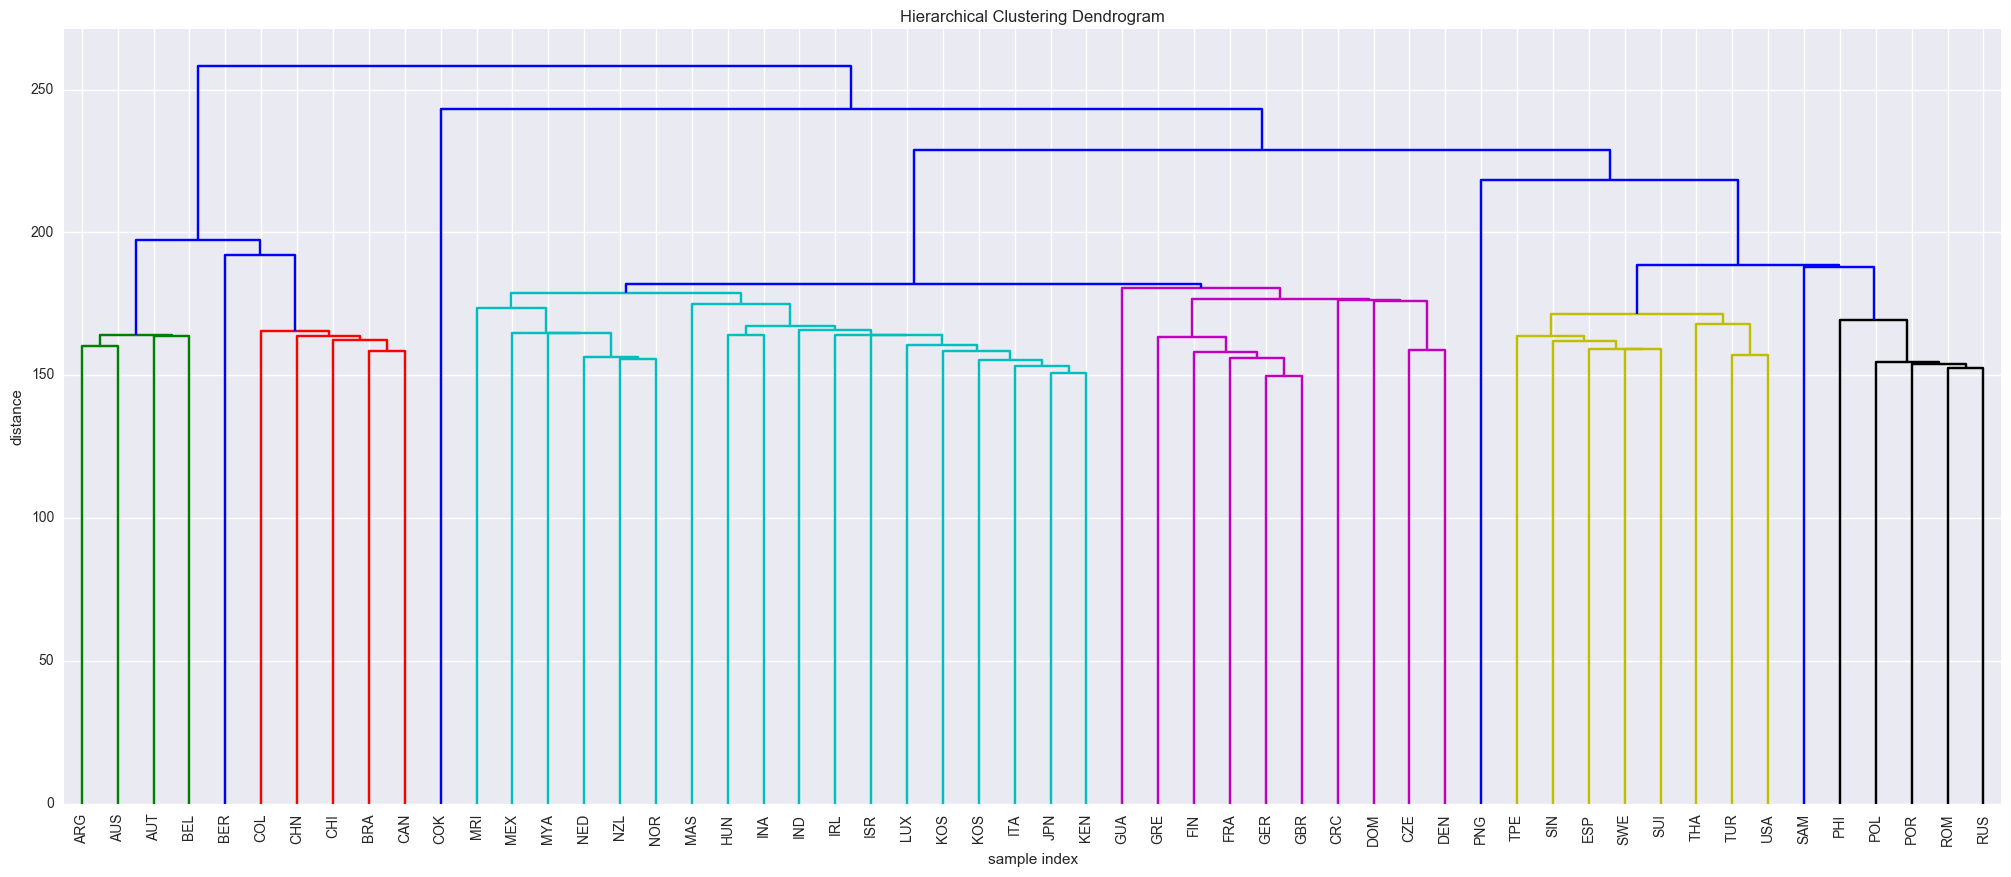

In [12]:
Z = sch.linkage(dis_mat, 'single')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax = sch.dendrogram(Z, leaf_rotation=90.,
    leaf_font_size=10., labels=data[:,0])

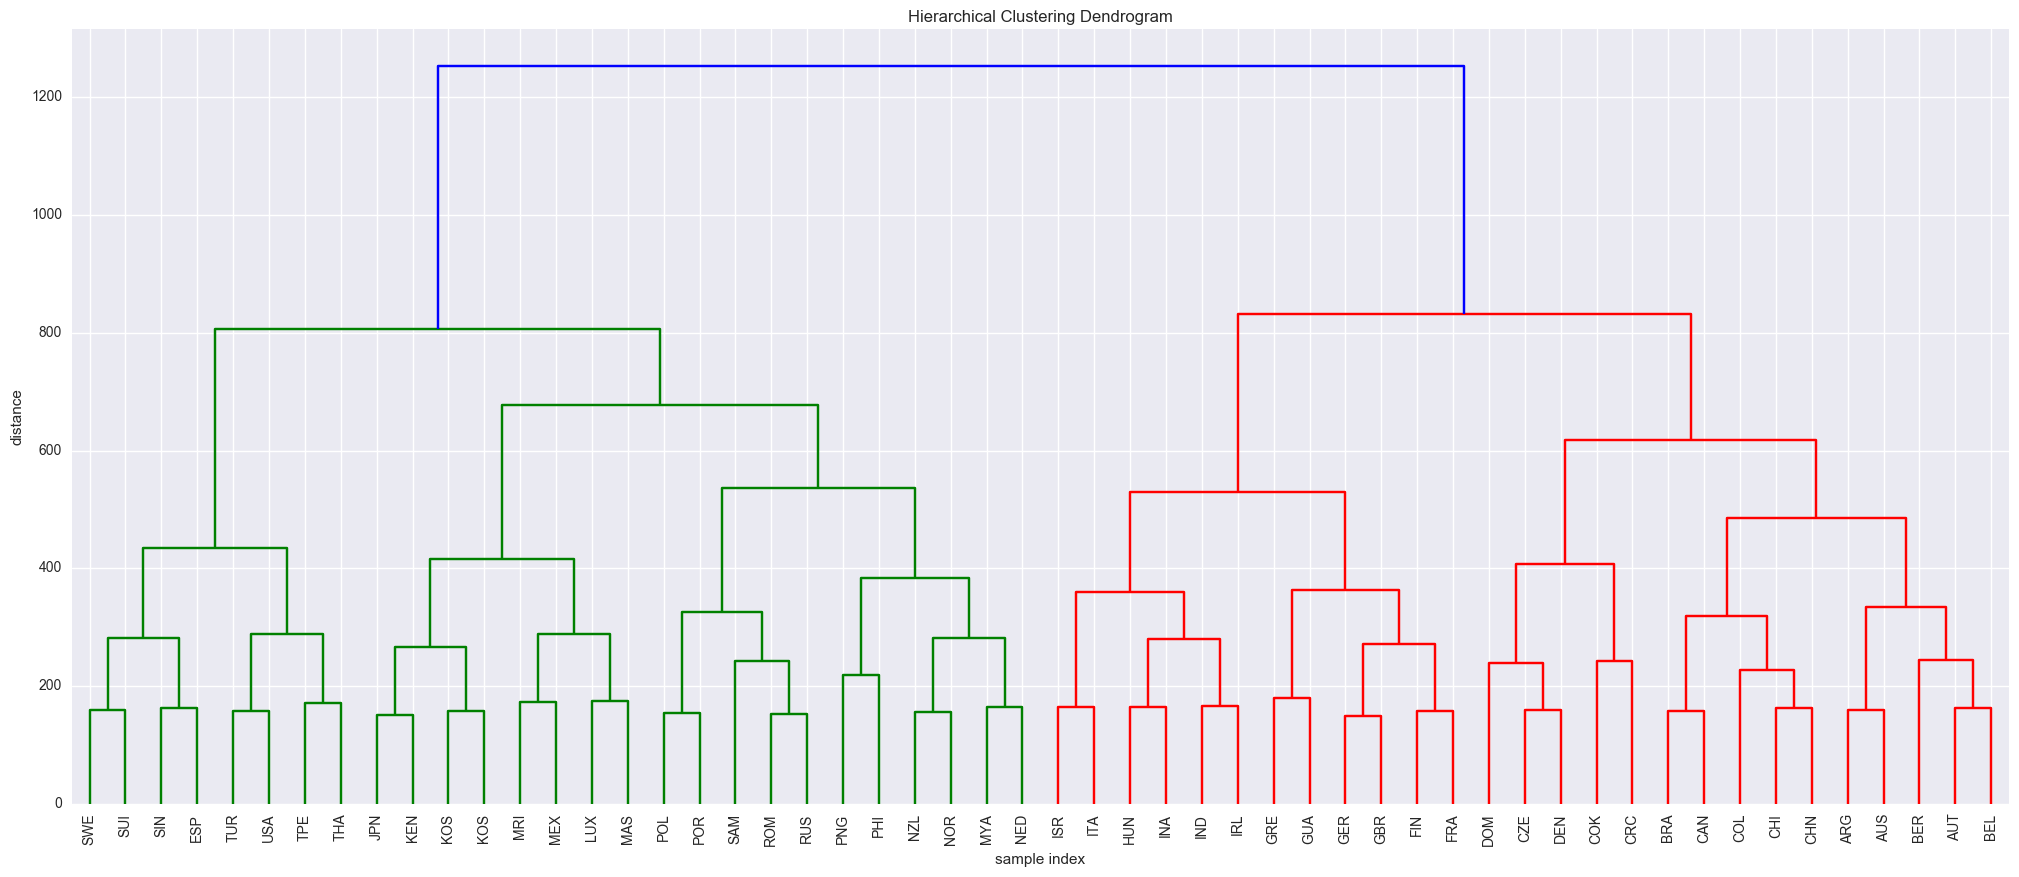

In [13]:
Z = sch.linkage(dis_mat, 'complete')
plt.figure(figsize=(25, 10))
plt.title('Hierarchical Clustering Dendrogram')
plt.xlabel('sample index')
plt.ylabel('distance')
ax = sch.dendrogram(Z, leaf_rotation=90.,
    leaf_font_size=10., labels=data[:,0])